In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [3]:
driver_count =pyber_data_df.count()["driver_count"]
driver_count

2375

In [4]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


In [6]:
# In Step 1, use the groupby() function to create a Series of 
# data that has the type of city as the index, 
# then apply the count() method to the "ride_id" column.

rides_by_city = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# In Step 2, use the groupby() function to create a Series of data that 
# has the type of city as the index, 
# then apply the sum() method to the "driver_count" column.

drivers_by_city = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# In Step 3, use the groupby() function to create a Series of data 
# that has the type of city as the index, 
# then apply the sum() method to the "fare" column.

fares_by_city = pyber_data_df.groupby(["type"]).sum()["fare"]
fares_by_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# In Step 4, calculate the average fare per ride by city type 
# by dividing the sum of all the fares by the total rides.

avg_fare_per_ride = fares_by_city / rides_by_city 
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# In Step 5, calculate the average fare per driver by city type 
# by dividing the sum of all the fares by the total drivers.

avg_fare_per_driver = fares_by_city / drivers_by_city
print(avg_fare_per_driver)

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64


In [11]:
# In Step 6, create a PyBer summary DataFrame with all the data gathered from Steps 1-5, 
# using the column names shown below:.
pyber_summary_df= pd.DataFrame({ 
        "Total Rides":  rides_by_city , 
        "Total Drivers":  drivers_by_city,
        "Total Fares":  fares_by_city,
        "Average Fare per Ride": avg_fare_per_ride,
        "Average Fare per Driver":  avg_fare_per_driver                    
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
#Step  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
#In Step 8, format the columns of the Pyber summary DataFrame to look like this:
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:.2f}".format)
pyber_summary_df.head()

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [14]:
#Deliverable 2: Step 1
PV_df = pyber_data_df.groupby(["date","type"]).sum()[["fare"]]
PV_df

,,fare
date,type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74
2019-01-01 02:07:24,Suburban,24.07
2019-01-01 03:46:50,Urban,7.57
2019-01-01 05:23:21,Urban,10.75
...,...,...
2019-05-08 04:20:00,Urban,21.99
2019-05-08 04:39:49,Urban,18.45
2019-05-08 07:29:01,Urban,18.55


In [15]:
# Deliverable #2: Step 2
wonderful_df= PV_df.reset_index()
wonderful_df

,date,type,fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [16]:
# Deliverable # 2: Step 3
wonderful_df = wonderful_df.pivot(index = "date", columns="type",values="fare")
wonderful_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [17]:
# Deliverable # 2: In Step 4, create a new DataFrame by using the loc method on the following date range: 2019-01-01 through 2019-04-28.
wonderful_df = wonderful_df.loc['2019-01-01' : '2019-04-29']
wonderful_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [18]:
# Deliverable # 2: In Step 5, use the provided code snippet to reset the index of the DataFrame 
# from the previous step (Step 4) to a datetime data type.
wonderful_df.index = pd.to_datetime(wonderful_df.index)
wonderful_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [19]:
# Deliverable #2: In Step 6, use the provided code snippet, df.info(), 
# to check that the "date" is a datetime data type.
wonderful_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [20]:
# Deliverable #2: In Step 7, create a new DataFrame by applying the 
# resample() function to the DataFrame you modified in Step 5.
wonderful_df = wonderful_df.resample('W').sum()
wonderful_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


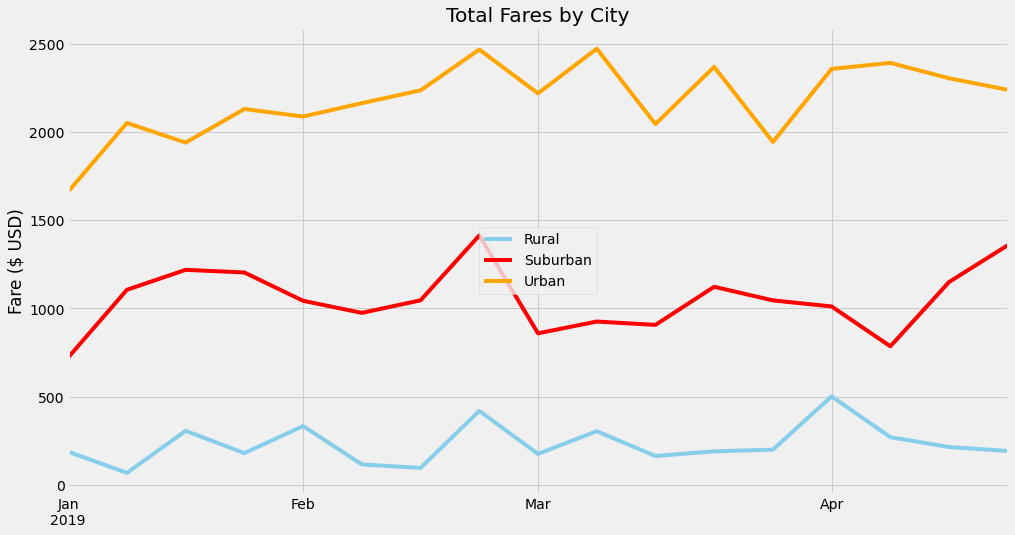

In [21]:
# Deliverable #2 Step 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# Import the style from Matplotlib.

from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

plt.rcParams['figure.figsize'] = [15,8]
wonderful_df.plot(color=['skyblue','red','orange'])

plt.ylabel("Fare ($ USD)")
plt.xlabel("")
plt.title("Total Fares by City")
plt.grid=(True)

plt.legend(loc='center')
plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()